In [63]:
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, euclidean

import sys
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./health-dataset/bags.csv', header=None)
dataset = np.array(df.values)

In [3]:
N = 20
verbose = False

km = KMeans(n_clusters=N, init='k-means++', max_iter=2000, n_init=1,
                verbose=verbose)

print("Clustering sparse data with {}".format(km))
t0 = time()
km.fit(dataset)
print("done in {}s".format(time() - t0))

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
    n_clusters=20, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 3.0908265113830566s


In [4]:
km.cluster_centers_.shape

(20, 1203)

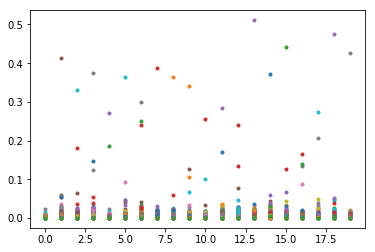

In [5]:
plt.plot(km.cluster_centers_, '.')
plt.show()

In [6]:
km.labels_

array([18,  0,  0, ...,  0,  4,  0], dtype=int32)

In [62]:
health_lines = []
with open('health-dataset/health.txt', 'r') as health_txt:
    health_aux = health_txt.readlines()
    health_aux.pop(0)
    for i in health_aux:
        health_lines.append(i.split('|')[-1])
prediction = km.predict(dataset[:])
labels = km.labels_
# print(prediction)
count = 0
for i in labels:
    if i == 18:
        print("Cluster {}: {}".format(i, health_lines[count]))
    count += 1

Cluster 18: An abundance of online info can turn us into e-hypochondriacs. Or, worse, lead us to neglect getting the care we need

Cluster 18: Should the mentally ill get care or jail time? An autistic man is in prison for thinking about a crime @drsanjaygupta

Cluster 18: RT @cnnbrk: Officials: Second health care worker at Texas hospital who cared for Thomas Eric Duncan tested positive for Ebola.

Cluster 18: .@elizabethrydan Family released his name, not the hospital or @CDCgov. HIPPA prevents health care workers from doing so #EbolaQandA

Cluster 18: .@repentedhipster Health care workers are most at risk b/c they are nearest to patients' bodily fluids like vomit, blood #EbolaQandA

Cluster 18: .@jensan1332 Health care workers are most at risk b/c they come in frequent contact with patients' bodily fluids #EbolaQandA

Cluster 18: What saved Nancy Writebol from #Ebola: Supportive care? An experimental drug? God? See her answer:

Cluster 18: Ever have to wait for care? More problems fo

In [55]:
silhouette = metrics.silhouette_score(dataset, km.labels_)

In [56]:
silhouette

0.028766275707805107

In [12]:
dataset.shape

(13229, 1203)

In [69]:
closest, aux = pairwise_distances_argmin_min(km.cluster_centers_, dataset)

distance1 = []
# distance2 = []
# distance3 = []
# distance4 = []
# distance5 = []

for i in dataset:
        distance1.append(np.linalg.norm(i - km.cluster_centers_[13]))
#         distance2.append(euclidean(i, km.cluster_centers_[1]))
#         distance3.append(euclidean(i, km.cluster_centers_[2]))
#         distance4.append(euclidean(i, km.cluster_centers_[3]))
#         distance5.append(euclidean(i, km.cluster_centers_[4]))

distance1 = np.asarray(distance1)
# distance2 = np.asarray(distance2)

In [72]:
closest

array([  99,   99,   99,   99,   99,   99,   99,   99,   99,   99,   99,
         99,   99, 2628,   99,   99,   99,   99,   99,   99])

In [71]:
print(np.where(distance1 == distance1.min()))
# print(np.where(distance2 == distance2.min()))
# print(distance3.index(min(distance3)))
# print(distance4.index(min(distance4)))
# print(distance5.index(min(distance5)))

(array([ 2628,  9672, 10724, 10931, 11194, 12527]),)


In [70]:
print(min(distance1))
print(euclidean(dataset[2628], km.cluster_centers_[13]))
print(np.linalg.norm(dataset[2628] - km.cluster_centers_[13]))

0.5045137802845819
0.5045137802845819
0.5045137802845819


In [ ]:
print(health_lines[98])

In [ ]:
i = 0
for i in range(dataset.shape[0]):
    pass
print(i)

In [ ]:
run = False
if run:
    Nc = range(1, 30)

    kmeans = []
    score = []

    for i in Nc:
        kmeans.append(KMeans(n_clusters=i))

    for i in range(len(kmeans)):
        print('Fitting kmeans with {} clusters'.format(kmeans[i].n_clusters))
        score.append(kmeans[i].fit(dataset).score(dataset))

    plt.plot(Nc,score)

    plt.xlabel('Number of Clusters')

    plt.ylabel('Score')

    plt.title('Elbow Curve')

    plt.show()

# Aqui tentei usar o txt para fazer o k-means, mas não terminei

In [ ]:
health_lines = []
with open('health-dataset/health.txt', 'r') as health_txt:
    health_aux = health_txt.readlines()
    health_aux.pop(0)
    for i in health_aux:
        health_lines.append(i.split('|')[-1])
len(health_lines)

In [ ]:
from nltk.corpus import stopwords
import nltk
# nltk.download()

In [ ]:
sw = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=sw)
X = vectorizer.fit_transform(health_lines)
# X = vectorizer.transform(health_lines)

In [ ]:
type(X)

In [ ]:
print(X)

In [ ]:
vectorizer.vocabulary_

In [ ]:
N = 6
verbose = False

km = KMeans(n_clusters=N, init='k-means++', max_iter=1000, n_init=1,
                verbose=verbose)

print("Clustering sparse data with {}".format(km))
t0 = time()
km.fit(X)
print("done in {}s".format(time() - t0))

In [ ]:
Nc = range(1, 30)

kmeans = []
score = []

for i in Nc:
    kmeans.append(KMeans(n_clusters=i))

for i in range(len(kmeans)):
    print('Fitting kmeans with {} clusters'.format(kmeans[i].n_clusters))
    score.append(kmeans[i].fit(X).score(X))

In [ ]:
plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [ ]:
print(km.predict(X[10:20]))